In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
energy = pd.read_excel("Lab5 Dataset/En_In.xls")
gpd = pd.read_csv("Lab5 Dataset/gpd.csv")
scimagojr = pd.read_excel("Lab5 Dataset/scimagojr.xlsx")

In [3]:
energy = energy.drop(range(244, 282))
energy = energy.drop(range(17))
energy = energy.drop(columns=["Unnamed: 0", "Unnamed: 1"])
energy.columns = ["Country", "Energy Supply", "Energy Supply per Capita", "% Renewable"]
energy = energy.replace(["..."], np.NaN)
energy

,Country,Energy Supply,Energy Supply per Capita,% Renewable
17,Afghanistan,321.0,10.0,78.669280
18,Albania,102.0,35.0,100.000000
19,Algeria,1959.0,51.0,0.551010
20,American Samoa,NaN,NaN,0.641026
21,Andorra,9.0,121.0,88.695650
...,...,...,...,...
239,Viet Nam,2554.0,28.0,45.321520
240,Wallis and Futuna Islands,0.0,26.0,0.000000
241,Yemen,344.0,13.0,0.000000
242,Zambia,400.0,26.0,99.714670


In [4]:
energy["Energy Supply"] = energy["Energy Supply"] * 1_000_000
energy

,Country,Energy Supply,Energy Supply per Capita,% Renewable
17,Afghanistan,3.210000e+08,10.0,78.669280
18,Albania,1.020000e+08,35.0,100.000000
19,Algeria,1.959000e+09,51.0,0.551010
20,American Samoa,NaN,NaN,0.641026
21,Andorra,9.000000e+06,121.0,88.695650
...,...,...,...,...
239,Viet Nam,2.554000e+09,28.0,45.321520
240,Wallis and Futuna Islands,0.000000e+00,26.0,0.000000
241,Yemen,3.440000e+08,13.0,0.000000
242,Zambia,4.000000e+08,26.0,99.714670


In [5]:
energy["Country"] = energy["Country"].replace(["Republic of Korea"], "South Korea")
energy["Country"] = energy["Country"].replace(["United States of America"], "United states")
energy["Country"] = energy["Country"].replace(["United Kingdom of Great Britain and Northern Ireland"], "United kingdom")
energy["Country"] = energy["Country"].replace(["China, Hong Kong Special Administrative Region"], "Hong Kong")

def correct_country_name(s):
    res = []
    for e in s:
        if e.isdigit():
            continue
        elif e == "(":
            break
        else:
            res.append(e)
    return "".join(res).rstrip()

energy["Country"] = energy["Country"].apply(lambda x: correct_country_name(x))
energy.loc[energy["Country"].isin(["American Samoa", "South Korea", "Bolivia"])]

,Country,Energy Supply,Energy Supply per Capita,% Renewable
20,American Samoa,NaN,NaN,0.641026
41,Bolivia,3.360000e+08,32.0,31.477120
181,South Korea,1.100700e+10,221.0,2.279353


In [6]:
headers = list(gpd.loc[3])
headers[0] = "Country"
for i in range(4, len(headers)):
    headers[i] = int(headers[i])
gpd.columns = headers
gpd = gpd.drop([0, 1, 2, 3])
gpd

,Country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
4,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
5,Andorra,AND,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN
6,Afghanistan,AFG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10
7,Angola,AGO,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.581103e+10,6.842044e+10,7.787420e+10,7.975320e+10,8.247091e+10,8.570262e+10,9.012096e+10,9.626143e+10,1.008863e+11,1.039106e+11
8,Albania,ALB,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,9.771760e+09,1.034829e+10,1.112752e+10,1.150029e+10,1.192695e+10,1.223109e+10,1.240477e+10,1.254247e+10,1.279331e+10,1.312082e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,"Yemen, Rep.",YEM,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.672565e+10,2.761787e+10,2.872656e+10,2.991436e+10,3.090675e+10,2.624342e+10,2.689160e+10,2.800914e+10,NaN,NaN
264,South Africa,ZAF,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,7.707081e+10,8.003449e+10,8.497844e+10,9.124438e+10,9.848904e+10,1.072507e+11,...,3.402852e+11,3.585261e+11,3.699668e+11,3.642764e+11,3.753494e+11,3.874074e+11,3.960071e+11,4.047682e+11,4.110369e+11,4.163117e+11
265,"Congo, Dem. Rep.",COD,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,1.508024e+10,1.344383e+10,1.629401e+10,1.714358e+10,1.672524e+10,1.689205e+10,...,1.650894e+10,1.754232e+10,1.863448e+10,1.916651e+10,2.052329e+10,2.193213e+10,2.350200e+10,2.550050e+10,2.778776e+10,2.970961e+10
266,Zambia,ZMB,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,4.592975e+09,4.655503e+09,4.539542e+09,4.688093e+09,5.260699e+09,6.136472e+09,...,1.440569e+10,1.560892e+10,1.682234e+10,1.837342e+10,2.026555e+10,2.140358e+10,2.302438e+10,2.420595e+10,2.542227e+10,2.624127e+10


In [7]:
gpd["Country"] = gpd["Country"].replace(["Korea, Rep."], "South Korea")
gpd["Country"] = gpd["Country"].replace(["Iran, Islamic Rep."], "Iran")
gpd["Country"] = gpd["Country"].replace(["Hong Kong SAR, China"], "Hong Kong")

gpd[gpd["Country"] == "Hong Kong"]

,Country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
97,Hong Kong,HKG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,1.764691e+10,...,2.019164e+11,2.149698e+11,2.195440e+11,2.141452e+11,2.286377e+11,2.396459e+11,2.437206e+11,2.512081e+11,2.577757e+11,2.638606e+11


In [8]:
df = pd.merge(scimagojr, energy, how="left", on="Country")
df = pd.merge(df, gpd, how="left", on="Country")

df = df.set_index("Country")
df = df.astype({"Rank": int})
df = df.drop(columns=[x for x in range(1960, 2006)])
df = df.drop(columns=["Country Code", "Indicator Code", "Indicator Name"])
df.columns

Index([                    'Rank',                'Documents',
              'Citable documents',                'Citations',
                 'Self-citations',   'Citations per document',
                        'H index',            'Energy Supply',
       'Energy Supply per Capita',              '% Renewable',
                             2006,                       2007,
                             2008,                       2009,
                             2010,                       2011,
                             2012,                       2013,
                             2014,                       2015],
      dtype='object')

In [9]:
df = df[:15]
df

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,NaN,NaN,NaN,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,NaN,NaN,NaN,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


In [10]:
df.shape

(15, 20)

In [11]:
def task8():
    years = [x for x in range(2006, 2016)]
    return df[years].mean(axis=1, skipna=True).sort_values(ascending=False)


def task9():
    return "France", df.loc["France"][2015] - df.loc["France"][2006]


def task10():
    res = list(df.sort_values("% Renewable", ascending=False).index.values)[0]
    return res, df.loc[res]["% Renewable"]


def task11():
    df["Population"] = df["Energy Supply"] / df["Energy Supply per Capita"]
    res = list(df["Population"].sort_values(ascending=False).index.values)[4]
    return res, df.loc[res]["Population"]


def task12():
    df["CitPerCap"] = df["Citable documents"] / df["Population"]
    return df["Energy Supply per Capita"].corr(df['CitPerCap'], method="pearson")


def task13():
    temp = df["% Renewable"].median(axis=0)
    df["renew"] = df.apply(lambda x: 1 if x["% Renewable"] > temp else 0, axis=1)
    df.sort_values(by='Rank')
    return df["renew"]


def task14():
    ContinentDict = {'China': 'Asia',
                     'United States': 'North America',
                     'Japan': 'Asia',
                     'United Kingdom': 'Europe',
                     'Russian Federation': 'Europe',
                     'Canada': 'North America',
                     'Germany': 'Europe',
                     'India': 'Asia',
                     'France': 'Europe',
                     'South Korea': 'Asia',
                     'Italy': 'Europe',
                     'Spain': 'Europe',
                     'Iran': 'Asia',
                     'Australia': 'Australia',
                     'Brazil': 'South America'}
    temp = pd.DataFrame(columns=['size', 'sum', 'mean', 'std'])
    df['Population'] = df['Energy Supply'] / df['Energy Supply per Capita']
    for elem, val in df.groupby(ContinentDict):
        temp.loc[elem] = [len(val), val['Population'].sum(), val['Population'].mean(), val['Population'].std()]
    temp = temp.astype({"size": int})
    return temp


def task15():
    ContinentDict  = {'China':['Asia', "yellow"],
                  'United States':['North America', "red"],
                  'Japan':['Asia', "yellow"], 
                  'United Kingdom':['Europe', "blue"],
                  'Russian Federation':['Europe', "blue"],
                  'Canada':['North America', "red"],
                  'Germany':['Europe', "blue"],
                  'India':['Asia', "yellow"],
                  'France':['Europe', "blue"],
                  'South Korea':['Asia', "yellow"], 
                  'Italy':['Europe', "blue"],
                  'Spain':['Europe', "blue"],
                  'Iran':['Asia', "yellow"],
                  'Australia':['Australia', "green"],
                  'Brazil':['South America', "cyan"]}
    
    x, y, z = df["Rank"], df["% Renewable"], list(df.index.values)
    for i, text in enumerate(list(df.index)):
        plt.annotate(text, (x[i] - 0.3, y[i]))
    for elem in z:
        plt.scatter(x=x.loc[elem], y=y.loc[elem], s=df[2015][elem]/10_000_000_000*8, alpha = 0.4, c = ContinentDict[elem][1])
    plt.xticks([i for i in range(0, len(list(df.index))+1)])
    plt.gcf().set_size_inches((15, 5))  
    plt.show()

In [12]:
task8()

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
dtype: float64

In [13]:
task9()

('France', 153345695364.24023)

In [14]:
task10()

('Brazil', 69.64803)

In [15]:
task11()

('Japan', 127409395.97315437)

In [16]:
task12()

0.8642899768854406

In [17]:
task13()

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    0
Canada                1
Germany               1
India                 0
France                0
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: renew, dtype: int64

In [18]:
task14()

,size,sum,mean,std
Asia,5,2.898666e+09,5.797333e+08,6.790979e+08
Australia,1,2.331602e+07,2.331602e+07,NaN
Europe,6,3.940587e+08,7.881174e+07,3.813228e+07
North America,2,3.523986e+07,3.523986e+07,NaN
South America,1,2.059153e+08,2.059153e+08,NaN


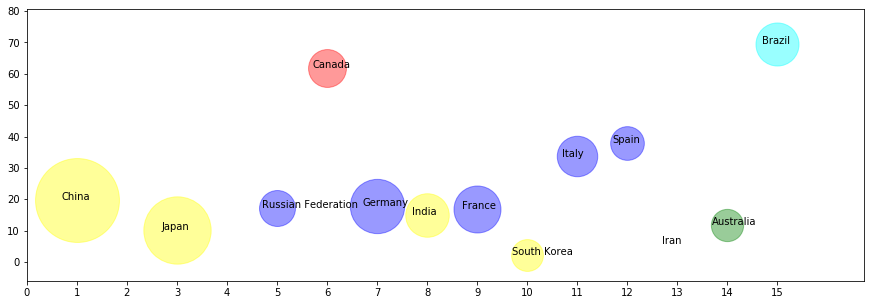

In [19]:
task15()

In [20]:
ContinentDict = {'China': 'Asia',
                 'United States': 'North America',
                 'Japan': 'Asia',
                 'United Kingdom': 'Europe',
                 'Russian Federation': 'Europe',
                 'Canada': 'North America',
                 'Germany': 'Europe',
                 'India': 'Asia',
                 'France': 'Europe',
                 'South Korea': 'Asia',
                 'Italy': 'Europe',
                 'Spain': 'Europe',
                 'Iran': 'Asia',
                 'Australia': 'Australia',
                 'Brazil': 'South America'}

temp = pd.DataFrame(columns=['size', 'Sum Self-citations'])
for elem, val in df.groupby(ContinentDict):
    temp.loc[elem] = [len(val), val['Self-citations'].sum()]
temp = temp.astype({"size": int})
temp.sort_values(by='Sum Self-citations').index.values[-1]

'Asia'